### Import Libraries

In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import cv2
from PIL import Image, ImageDraw
import ipywidgets as widgets
from IPython.display import display, clear_output
import io

print("TensorFlow version:", tf.__version__)
print("Libraries imported successfully!")

TensorFlow version: 2.20.0
Libraries imported successfully!


### Load and Explore Dataset

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Pixel value range: 0 - 255


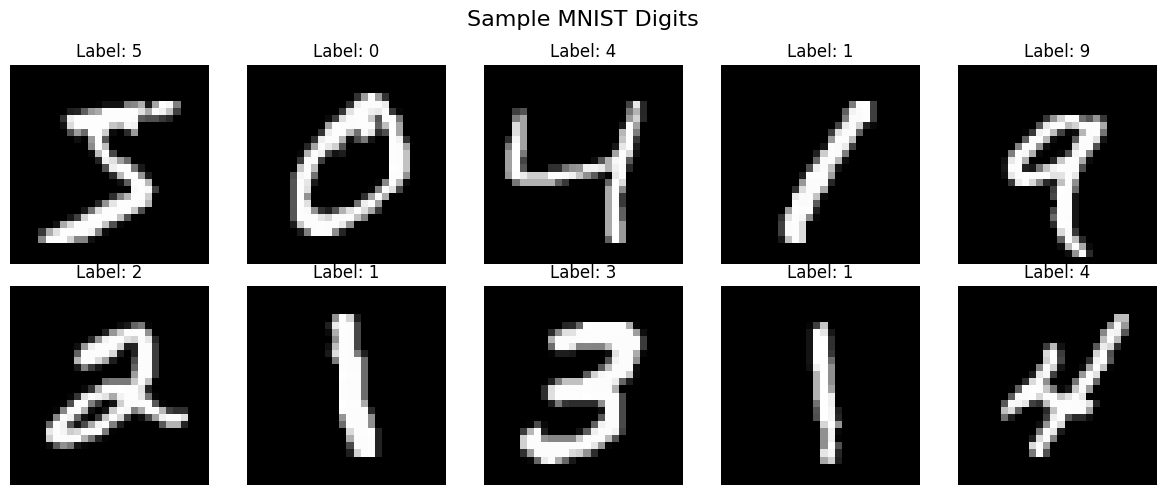

In [15]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display dataset information
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)
print("\nPixel value range:", X_train.min(), "-", X_train.max())

# Visualize sample digits
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Digits', fontsize=16)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

### Data Preprocessing

In [16]:
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to add channel dimension (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Preprocessed training data shape:", X_train.shape)
print("Preprocessed test data shape:", X_test.shape)
print("One-hot encoded labels shape:", y_train_cat.shape)
print("\nSample one-hot encoded label:")
print(f"Original label: {y_train[0]}")
print(f"One-hot encoded: {y_train_cat[0]}")

Preprocessed training data shape: (60000, 28, 28, 1)
Preprocessed test data shape: (10000, 28, 28, 1)
One-hot encoded labels shape: (60000, 10)

Sample one-hot encoded label:
Original label: 5
One-hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Build CNN Model

In [17]:
# Build CNN architecture
model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

c:\MyProjects\SGUProjects\SchoolMachineLearning\Character_Recognition\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [18]:
# Train the model
print("Training the model...")
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

print("\nTraining completed!")

Training the model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8603 - loss: 0.4449 - val_accuracy: 0.9768 - val_loss: 0.0764
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9608 - loss: 0.1327 - val_accuracy: 0.9853 - val_loss: 0.0513
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9734 - loss: 0.0945 - val_accuracy: 0.9870 - val_loss: 0.0436
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9786 - loss: 0.0755 - val_accuracy: 0.9905 - val_loss: 0.0344
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9821 - loss: 0.0615 - val_accuracy: 0.9907 - val_loss: 0.0324
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9845 - loss: 0.0537 - val_accuracy: 0.9898 - val_loss: 0.0366
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9864 - loss: 0.0466 - val_accuracy: 0.9922 - val_loss: 0.0305
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9879 -

### Evaluate Model Performance

Test Accuracy: 99.34%
Test Loss: 0.0234


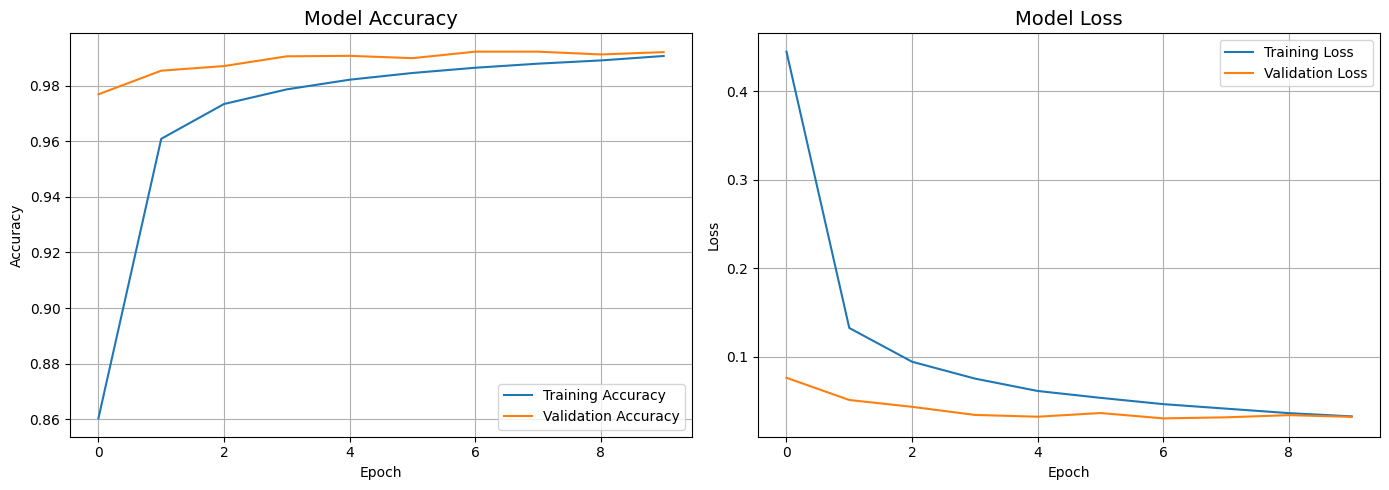

In [19]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy', fontsize=14)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss', fontsize=14)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### Test on Sample Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


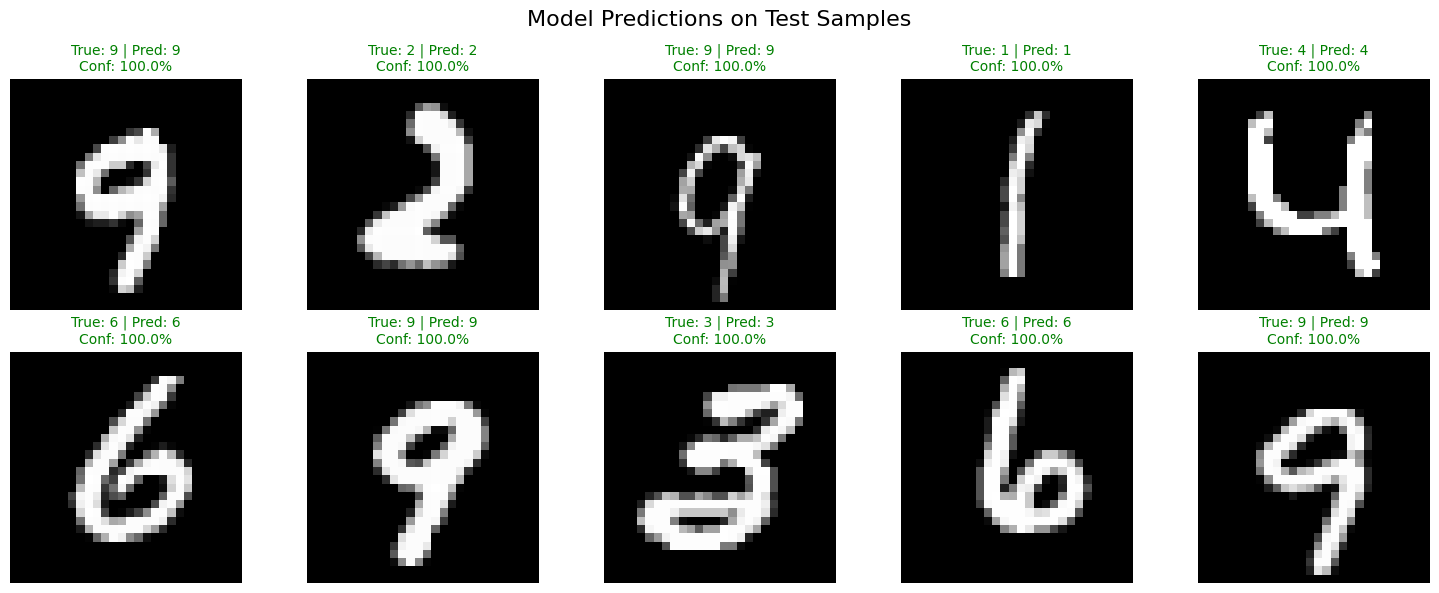

In [20]:
# Make predictions on test samples
n_samples = 10
sample_indices = np.random.choice(len(X_test), n_samples, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

# Predict
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Model Predictions on Test Samples', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    
    # Color code: green for correct, red for incorrect
    color = 'green' if predicted_labels[i] == sample_labels[i] else 'red'
    confidence = predictions[i][predicted_labels[i]] * 100
    
    ax.set_title(f'True: {sample_labels[i]} | Pred: {predicted_labels[i]}\nConf: {confidence:.1f}%', 
                 color=color, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

### Interactive Drawing Interface

In [31]:
# Simple and reliable image upload predictor
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import io

class ImageUploadPredictor:
    def __init__(self, model):
        self.model = model
        
        # Create file upload widget
        self.upload = widgets.FileUpload(
            accept='image/*',
            multiple=False
        )
        
        # Create predict button
        self.predict_btn = widgets.Button(
            description='🔍 Predict Digit',
            button_style='success',
            layout=widgets.Layout(width='200px', height='45px')
        )
        
        # Output area
        self.output = widgets.Output()
        
        # Bind events
        self.upload.observe(self.on_upload, names='value')
        self.predict_btn.on_click(self.predict)
        
        self.current_image = None
        
    def on_upload(self, change):
        if len(self.upload.value) > 0:
            uploaded_file = list(self.upload.value.values())[0]
            self.current_image = Image.open(io.BytesIO(uploaded_file['content'])).convert('L')
            
            with self.output:
                clear_output(wait=True)
                print("✅ Image uploaded successfully! Click 'Predict Digit' to classify.")
                plt.figure(figsize=(5, 5))
                plt.imshow(self.current_image, cmap='gray')
                plt.title('Uploaded Image', fontsize=14, weight='bold')
                plt.axis('off')
                plt.tight_layout()
                plt.show()
    
    def predict(self, b=None):
        if self.current_image is None:
            with self.output:
                clear_output(wait=True)
                print("❌ Please upload an image first!")
            return
        
        # Preprocess image
        img = self.current_image.resize((28, 28), Image.LANCZOS)
        img_array = np.array(img)
        
        # Check if we need to invert (white digit on black background for MNIST)
        if img_array.mean() > 127:
            img_array = 255 - img_array
        
        # Normalize
        img_array = img_array.astype('float32') / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)
        
        # Predict
        prediction = self.model.predict(img_array, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = prediction[0][predicted_digit] * 100
        
        # Display results
        with self.output:
            clear_output(wait=True)
            
            fig = plt.figure(figsize=(16, 5))
            
            # Original image
            ax1 = plt.subplot(1, 3, 1)
            ax1.imshow(self.current_image, cmap='gray')
            ax1.set_title('Original Image', fontsize=14, weight='bold')
            ax1.axis('off')
            
            # Preprocessed image
            ax2 = plt.subplot(1, 3, 2)
            ax2.imshow(img_array.reshape(28, 28), cmap='gray')
            ax2.set_title('Preprocessed (28x28)', fontsize=14, weight='bold')
            ax2.axis('off')
            
            # Probabilities
            ax3 = plt.subplot(1, 3, 3)
            colors = ['#4CAF50' if i == predicted_digit else '#2196F3' for i in range(10)]
            bars = ax3.bar(range(10), prediction[0] * 100, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
            ax3.set_xlabel('Digit', fontsize=13, weight='bold')
            ax3.set_ylabel('Probability (%)', fontsize=13, weight='bold')
            ax3.set_title(f'Predicted: {predicted_digit} ({confidence:.1f}%)', 
                         fontsize=15, color='#4CAF50', weight='bold', pad=15)
            ax3.set_xticks(range(10))
            ax3.set_ylim([0, 105])
            ax3.grid(axis='y', alpha=0.3, linestyle='--')
            
            # Add value labels on bars
            for i, bar in enumerate(bars):
                height = bar.get_height()
                ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                        f'{height:.1f}%', ha='center', va='bottom', fontsize=9)
            
            plt.tight_layout()
            plt.show()
            
            # Print detailed results
            print(f"\n{'='*70}")
            print(f"{'🎯 PREDICTION RESULTS':^70}")
            print(f"{'='*70}")
            print(f"\n  ✅ Predicted Digit: {predicted_digit}")
            print(f"  📊 Confidence: {confidence:.2f}%\n")
            print(f"{'─'*70}")
            print(f"  📈 Probability Distribution:")
            print(f"{'─'*70}")
            
            for i in range(10):
                prob = prediction[0][i] * 100
                bar_length = int(prob / 2)
                bar = '█' * bar_length
                emoji = '👉' if i == predicted_digit else '  '
                print(f"  {emoji} Digit {i}: {bar:<50} {prob:6.2f}%")
            
            print(f"{'='*70}\n")
    
    def display(self):
        # Instructions
        instruction = widgets.HTML(
            value="""
            <div style='background-color: #e3f2fd; padding: 25px; border-radius: 12px; 
                        border-left: 6px solid #2196F3; box-shadow: 0 2px 4px rgba(0,0,0,0.1);'>
                <h2 style='margin: 0 0 15px 0; color: #1565C0; font-family: Arial;'>
                    📤 Upload Handwritten Digit Image
                </h2>
                <div style='background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;'>
                    <h3 style='margin: 0 0 10px 0; color: #424242;'>📝 Instructions:</h3>
                    <ol style='margin: 5px 0; color: #616161; line-height: 1.8;'>
                        <li>Click the <b>"Upload"</b> button below</li>
                        <li>Select an image file containing a handwritten digit (0-9)</li>
                        <li>Wait for the image to display</li>
                        <li>Click <b>"🔍 Predict Digit"</b> to see the result</li>
                    </ol>
                </div>
                <div style='background-color: #fff3e0; padding: 12px; border-radius: 8px; 
                            margin-top: 15px; border-left: 4px solid #FF9800;'>
                    <p style='margin: 0; color: #E65100;'>
                        <b>💡 Tips for Best Results:</b><br>
                        • Use clear images with dark digits on light background<br>
                        • Center the digit in the image<br>
                        • Avoid extra marks or noise<br>
                        • Supported formats: PNG, JPG, JPEG
                    </p>
                </div>
            </div>
            """
        )
        
        # How to create test images
        drawing_help = widgets.HTML(
            value="""
            <div style='background-color: #f1f8e9; padding: 20px; border-radius: 12px; 
                        border-left: 6px solid #4CAF50; margin-top: 20px;'>
                <h3 style='margin: 0 0 15px 0; color: #2E7D32;'>🎨 How to Create Test Images:</h3>
                <div style='display: grid; grid-template-columns: 1fr 1fr; gap: 15px;'>
                    <div style='background-color: white; padding: 15px; border-radius: 8px;'>
                        <h4 style='margin: 0 0 10px 0; color: #424242;'>Option 1: Online Tools</h4>
                        <ul style='margin: 0; color: #616161; line-height: 1.6;'>
                            <li><a href="https://kleki.com/" target="_blank">Kleki</a> - Simple drawing tool</li>
                            <li><a href="https://www.autodraw.com/" target="_blank">AutoDraw</a> - Google's tool</li>
                            <li><a href="https://jspaint.app/" target="_blank">JS Paint</a> - MS Paint online</li>
                        </ul>
                    </div>
                    <div style='background-color: white; padding: 15px; border-radius: 8px;'>
                        <h4 style='margin: 0 0 10px 0; color: #424242;'>Option 2: Desktop Apps</h4>
                        <ul style='margin: 0; color: #616161; line-height: 1.6;'>
                            <li>Windows: Paint, Paint 3D</li>
                            <li>Mac: Preview, Paintbrush</li>
                            <li>Linux: GIMP, Krita</li>
                        </ul>
                    </div>
                </div>
            </div>
            """
        )
        
        # Upload and button controls
        controls = widgets.HBox(
            [self.upload, self.predict_btn], 
            layout=widgets.Layout(
                justify_content='center', 
                margin='25px 0',
                padding='15px',
                border='2px dashed #2196F3',
                border_radius='10px'
            )
        )
        
        # Complete layout
        layout = widgets.VBox([
            instruction,
            drawing_help,
            controls,
            self.output
        ])
        
        display(layout)

# Create and display the upload predictor
print("="*70)
print("✅ Image Upload Interface Ready!")
print("="*70)
print("\n📌 This interface allows you to upload and test handwritten digit images.")
print("📌 Scroll down to see the upload button.\n")

upload_predictor = ImageUploadPredictor(model)
upload_predictor.display()

✅ Image Upload Interface Ready!

📌 This interface allows you to upload and test handwritten digit images.
📌 Scroll down to see the upload button.



### Testing with Sample MNIST Images
This will be done if the Drawing Interface does not work

🎲 Testing with random MNIST samples...



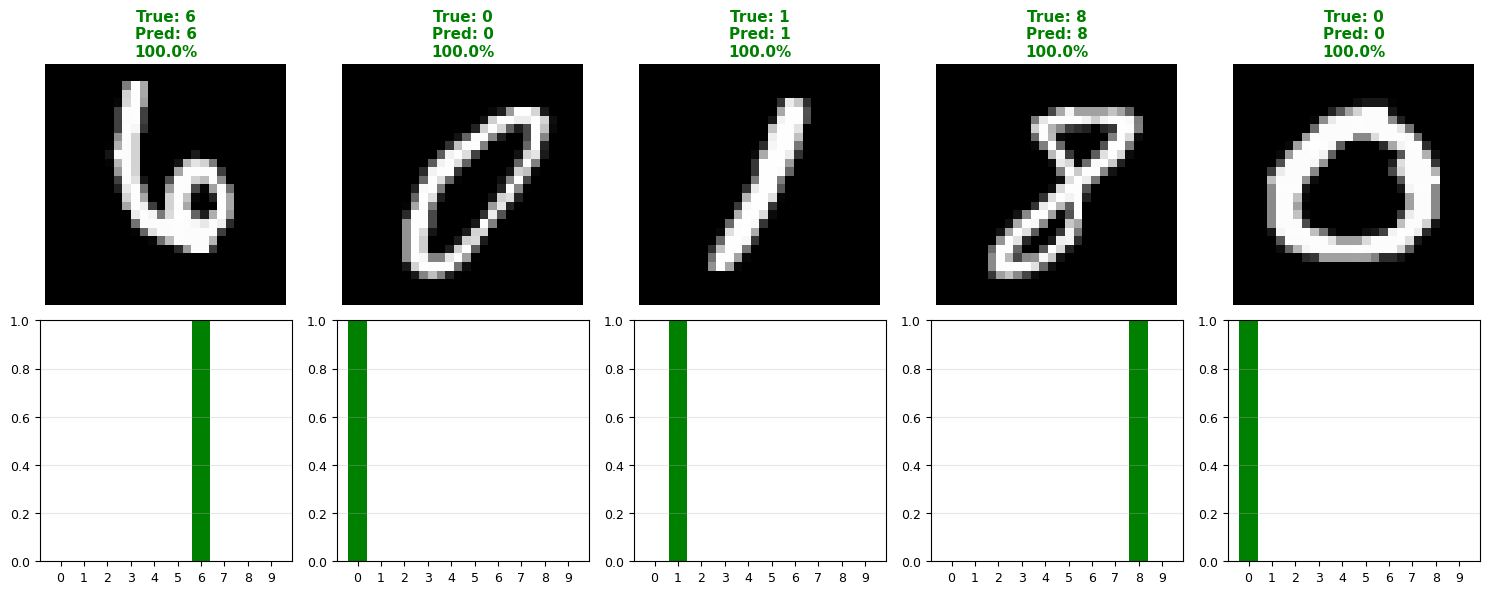


💡 Run this cell again to test with different random samples!


In [35]:
# Test with random MNIST samples interactively
import random

def test_random_samples(n=5):
    """Test model on random MNIST samples"""
    indices = random.sample(range(len(X_test)), n)
    
    fig, axes = plt.subplots(2, n, figsize=(3*n, 6))
    
    for i, idx in enumerate(indices):
        # Get image and true label
        img = X_test[idx]
        true_label = y_test[idx]
        
        # Predict
        prediction = model.predict(img.reshape(1, 28, 28, 1), verbose=0)
        pred_label = np.argmax(prediction)
        confidence = prediction[0][pred_label] * 100
        
        # Display image
        axes[0, i].imshow(img.reshape(28, 28), cmap='gray')
        color = 'green' if pred_label == true_label else 'red'
        axes[0, i].set_title(f'True: {true_label}\nPred: {pred_label}\n{confidence:.1f}%', 
                            color=color, fontsize=11, weight='bold')
        axes[0, i].axis('off')
        
        # Display probabilities
        colors = ['green' if j == pred_label else 'lightblue' for j in range(10)]
        axes[1, i].bar(range(10), prediction[0], color=colors, width=0.8)
        axes[1, i].set_ylim([0, 1])
        axes[1, i].set_xticks(range(10))
        axes[1, i].tick_params(labelsize=9)
        axes[1, i].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Test with 5 random samples
print("🎲 Testing with random MNIST samples...\n")
test_random_samples(5)

print("\n💡 Run this cell again to test with different random samples!")

### Save Model

In [33]:
# Save the trained model
model.save('mnist_cnn_model.h5')
print("Model saved as 'mnist_cnn_model.h5'")

# To load the model later:
# loaded_model = keras.models.load_model('mnist_cnn_model.h5')

Model saved as 'mnist_cnn_model.h5'
